# Dry Beans Models Project Notebook (Team 14)
##### Follow the steps in the README.md file to create and activate the virtual environment before running notebook cells 
##### https://github.com/collaboratorsje/Dry_Beans_Models

# Imports (Some imports may happen in later cells)

In [345]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from sklearn.model_selection import train_test_split

from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram
from scipy import stats
from mlxtend.frequent_patterns import apriori, association_rules

from sklearn.tree import (DecisionTreeClassifier as DTC, # Decision Tree for Classification
                          DecisionTreeRegressor as DTR, # Decision Tree for Regression
                          plot_tree, # Package for plotting trees
                          export_text)

from sklearn.ensemble import (RandomForestClassifier as RFC, # Random Forest for Classification
                              RandomForestRegressor as RFR, # Random Forest for Regression
                              GradientBoostingClassifier as GBC, # Boosting for Classification
                              GradientBoostingRegressor as GBR) # Boosting for Regression

from sklearn.metrics import (accuracy_score, # Method for finding Accuracy
                             confusion_matrix,
                             silhouette_score,
                             log_loss,
                             classification_report) # Method for finding the loss (log scale)

# Data pre-processing

In [274]:
# This cell converts our raw data file from .xlsx to .csv using pandas

# Load the xlsx file into a DataFrame
df = pd.read_excel('../raw_data/Dry_Bean_Dataset.xlsx')

# Save the DataFrame to a csv file
df.to_csv('../raw_data/Dry_Bean_Dataset.csv', index=False)

/Users/emery/Documents/GitHub/Dry_Beans_Models/venv/lib/python3.12/site-packages/openpyxl/packaging/core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
/Users/emery/Documents/GitHub/Dry_Beans_Models/venv/lib/python3.12/site-packages/openpyxl/packaging/core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


In [235]:
# Load the dataset
file_path = '../raw_data/Dry_Bean_Dataset.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.411785     29172.0     191.272751  0.783968  0.984986   0.887034   
2      0.562727     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.498616     30724.0     195.467062  0.782681  0.976696   0.903936   
4      0.333680     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [236]:
# Step 2: Exploratory Data Analysis (EDA)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13609 non-null  float64
 4   AspectRation     13608 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13609 non-null  float64
 7   EquivDiameter    13610 non-null  float64
 8   Extent           13608 non-null  float64
 9   Solidity         13608 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13610 non-null  float64
 13  ShapeFactor2     13610 non-null  float64
 14  ShapeFactor3     13610 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [237]:
print(data.describe())

                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13609.000000   
mean    53045.707369    855.283459       327.472588       202.272945   
std     29327.215648    214.289696       858.688485        44.973009   
min         9.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.313410       175.842829   
50%     44652.000000    794.941000       296.899313       192.437870   
75%     61332.000000    977.213000       376.504333       217.033886   
max    254616.000000   1985.370000    100000.000000       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13608.000000  13611.000000   13609.000000   13610.000000  13608.000000   
mean       1.583332      0.751585   53768.745536     253.068138      0.749728   
std        0.246631      0.121440   29779.126018      59.177529      0.049090   
min        1.024868      0.

In [238]:
# Calculate the count of each target variable
count = data['Class'].value_counts()
print(count)

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


In [239]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    2
AspectRation       3
Eccentricity       0
ConvexArea         2
EquivDiameter      1
Extent             3
Solidity           3
roundness          0
Compactness        0
ShapeFactor1       1
ShapeFactor2       1
ShapeFactor3       1
ShapeFactor4       0
Class              0
dtype: int64


In [240]:
print("Original size:", data.shape)

# Remove rows with any missing values
data = data.dropna()

print("Size after removing rows with missing values:", data.shape)

# Display the first few rows of the cleaned dataset
print(data.head())

Original size: (13611, 17)
Size after removing rows with missing values: (13595, 17)
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812     28715.0     190.141097  0.763923  0.988856   0.958027   
1      0.411785     29172.0     191.272751  0.783968  0.984986   0.887034   
2      0.562727     29690.0     193.410904  0.778113  0.989559   0.947849   
3      0.498616     30724.0     195.467062  0.782681  0.976696   0.903936   
4      0.333680     30417.0     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFact

In [241]:
# Check if the data is now clean
print(data.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [249]:
# Initialize an empty DataFrame to store cleaned data
data_cleaned = pd.DataFrame()

# Handle outliers within each class using only the IQR method
for class_name in data['Class'].unique():
    class_data = data[data['Class'] == class_name]
    class_data_numeric = class_data.select_dtypes(include=[np.number])
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = class_data_numeric.quantile(0.25)
    Q3 = class_data_numeric.quantile(0.75)
    IQR = Q3 - Q1

    # Define a multiplier (1.5 is standard for mild outliers)
    multiplier = 2.3
    
    # Determine outliers using IQR
    outliers = (class_data_numeric < (Q1 - multiplier * IQR)) | (class_data_numeric > (Q3 + multiplier * IQR))
    non_outliers = ~outliers.any(axis=1)
    data_filtered = class_data[non_outliers]

    # Concatenate the cleaned data of the current class to the main DataFrame
    data_cleaned = pd.concat([data_cleaned, data_filtered])

# Reset index after concatenating the class-specific cleaned DataFrames
data_cleaned.reset_index(drop=True, inplace=True)

# Now 'data_cleaned' is your DataFrame without outliers for each class

print("Original data shape:", data.shape)
print("Cleaned data shape:", data_cleaned.shape)
percent_original_data = data_cleaned.shape[0]/data.shape[0]
print(f'Percentage of original data remaining after cleaning: {percent_original_data}\n')

# Calculate the count of each target variable for both original and cleaned data
original_count = data['Class'].value_counts()
cleaned_count = data_cleaned['Class'].value_counts()

print(f"Cleaned class distribution: \n{original_count}")
print(f"\nCleaned class distribution: \n{cleaned_count}")


Original data shape: (13595, 17)
Cleaned data shape: (12925, 17)
Percentage of original data remaining after cleaning: 0.9507171754321442

Cleaned class distribution: 
DERMASON    3546
SIRA        2636
SEKER       2011
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

Cleaned class distribution: 
DERMASON    3379
SIRA        2554
SEKER       1871
HOROZ       1753
CALI        1595
BARBUNYA    1270
BOMBAY       503
Name: Class, dtype: int64


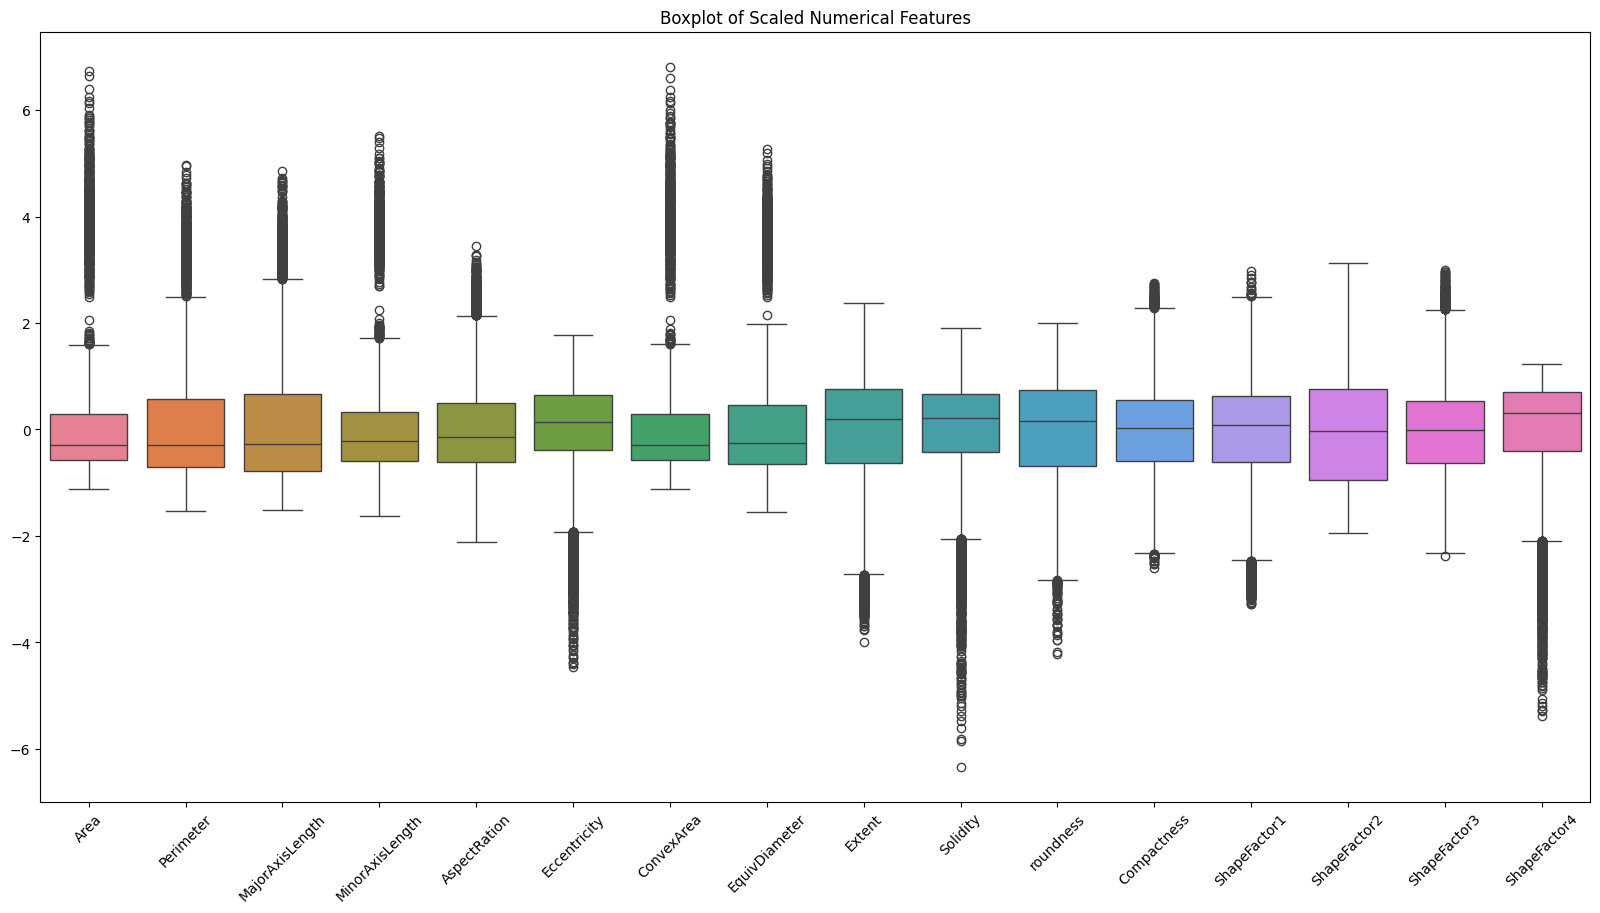

In [250]:
# Drop the 'Class' column to only scale numerical data
numerical_data = data_cleaned.drop('Class', axis=1)

# Save the class column to add back later
class_column = data_cleaned['Class']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical data and transform it
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Convert the scaled array back to a DataFrame
scaled_numerical_data_df = pd.DataFrame(scaled_numerical_data, columns=numerical_data.columns)

# Append the 'Class' column back to the scaled DataFrame
scaled_numerical_data_df['Class'] = class_column.values

data_cleaned = scaled_numerical_data_df

# Create a boxplot with the scaled data for numerical features only
plt.figure(figsize=(20, 10))
sns.boxplot(data=data_cleaned.drop('Class', axis=1))
plt.xticks(rotation=45)
plt.title('Boxplot of Scaled Numerical Features')
plt.show()



In [251]:
# This cell scales the data for each feature within each class, and visualizes the data with box plots
# After some testing, we decided not to scale within each class
'''
# Initialize a list to hold dataframes of scaled data for each class
scaled_dataframes = []

# Loop through each class to scale its numerical features
for class_name in data_cleaned['Class'].unique():
    # Isolate the data for the current class
    class_data = data_cleaned[data_cleaned['Class'] == class_name]
    numerical_data = class_data.drop('Class', axis=1)

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the numerical data and transform it
    scaled_numerical_data = scaler.fit_transform(numerical_data)

    # Convert the scaled array back to a DataFrame
    scaled_numerical_data_df = pd.DataFrame(scaled_numerical_data, columns=numerical_data.columns)
    
    # Add the class column back to identify the data
    scaled_numerical_data_df['Class'] = class_name
    
    # Append the scaled data of the current class to the list
    scaled_dataframes.append(scaled_numerical_data_df)

# Concatenate all the scaled dataframes into one
all_scaled_data = pd.concat(scaled_dataframes)

# Create the boxplot with the scaled data, separate by class
plt.figure(figsize=(20, 10))
sns.boxplot(data=pd.melt(all_scaled_data, id_vars=['Class'], value_vars=all_scaled_data.drop('Class', axis=1).columns),
            x='variable', y='value', hue='Class')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.title('Boxplot of Scaled Numerical Features by Class')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
'''


"\n# Initialize a list to hold dataframes of scaled data for each class\nscaled_dataframes = []\n\n# Loop through each class to scale its numerical features\nfor class_name in data_cleaned['Class'].unique():\n    # Isolate the data for the current class\n    class_data = data_cleaned[data_cleaned['Class'] == class_name]\n    numerical_data = class_data.drop('Class', axis=1)\n\n    # Initialize the StandardScaler\n    scaler = StandardScaler()\n\n    # Fit the scaler on the numerical data and transform it\n    scaled_numerical_data = scaler.fit_transform(numerical_data)\n\n    # Convert the scaled array back to a DataFrame\n    scaled_numerical_data_df = pd.DataFrame(scaled_numerical_data, columns=numerical_data.columns)\n    \n    # Add the class column back to identify the data\n    scaled_numerical_data_df['Class'] = class_name\n    \n    # Append the scaled data of the current class to the list\n    scaled_dataframes.append(scaled_numerical_data_df)\n\n# Concatenate all the scaled d

In [252]:
# Save the DataFrame to a csv file
file_path = '../clean_data/Dry_Bean_Dataset_Cleaned.csv'

# Check if the directory exists, and create it if it does not
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the DataFrame to a csv file
data_cleaned.to_csv(file_path, index=False)

In [253]:
# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())
print(data.shape)

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -0.844720  -1.142334        -1.311190        -0.635551     -1.577067   
1 -0.833197  -1.013292        -1.400321        -0.439158     -1.983997   
2 -0.811239  -1.078020        -1.257059        -0.590206     -1.526030   
3 -0.780681  -1.027678        -1.260152        -0.466339     -1.683551   
4 -0.772523  -1.051879        -1.255072        -0.439096     -1.705873   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -2.235423   -0.845072      -1.067733  0.276917  0.341167   1.435190   
1     -3.763554   -0.829764      -1.048668  0.687085 -0.701276   0.201725   
2     -2.092436   -0.812412      -1.012646  0.567284  0.530451   1.258360   
3     -2.561045   -0.781930      -0.963169  0.517669  0.517261   1.188903   
4     -2.634570   -0.773657      -0.950086  0.415224  0.478765   1.592986   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     1.8604

In [254]:
# Check for categorical variables
categorical_variables = data.select_dtypes(include=['object']).columns
print("Categorical Variables:")
print(categorical_variables)

Categorical Variables:
Index(['Class'], dtype='object')


In [257]:
# Check for quantitative variables
quantitative_variables = data.select_dtypes(include=['float64', 'int64']).columns
print("Numeric Features:")
print(quantitative_variables)

Numeric Features:
Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


In [258]:
# Step 3: Supervised Learning
X = data.drop('Class', axis=1)
y = data['Class']

# Create the train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression Accuracy: 0.942



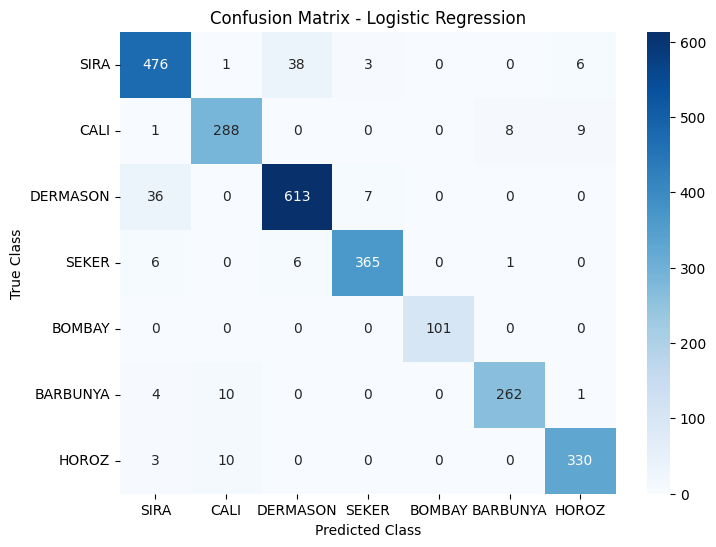

              precision    recall  f1-score   support

    BARBUNYA       0.97      0.95      0.96       277
      BOMBAY       1.00      1.00      1.00       101
        CALI       0.93      0.94      0.94       306
    DERMASON       0.93      0.93      0.93       656
       HOROZ       0.95      0.96      0.96       343
       SEKER       0.97      0.97      0.97       378
        SIRA       0.90      0.91      0.91       524

    accuracy                           0.94      2585
   macro avg       0.95      0.95      0.95      2585
weighted avg       0.94      0.94      0.94      2585



In [338]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_lr:.3f}\n")

class_names = y_test.unique()

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg, labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_logreg))


KNN Accuracy: 0.939



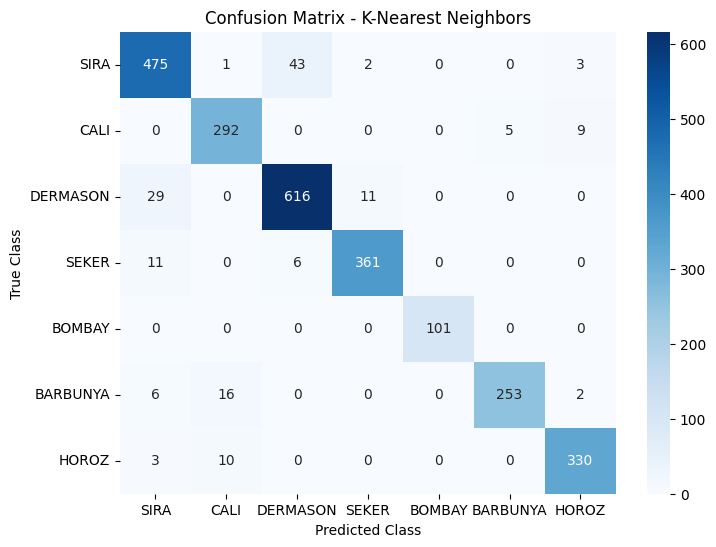

              precision    recall  f1-score   support

    BARBUNYA       0.98      0.91      0.95       277
      BOMBAY       1.00      1.00      1.00       101
        CALI       0.92      0.95      0.93       306
    DERMASON       0.93      0.94      0.93       656
       HOROZ       0.96      0.96      0.96       343
       SEKER       0.97      0.96      0.96       378
        SIRA       0.91      0.91      0.91       524

    accuracy                           0.94      2585
   macro avg       0.95      0.95      0.95      2585
weighted avg       0.94      0.94      0.94      2585



In [342]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(23)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.3f}\n")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_knn, labels=class_names)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_knn))

Accuracy of clustering-based classification: 0.829


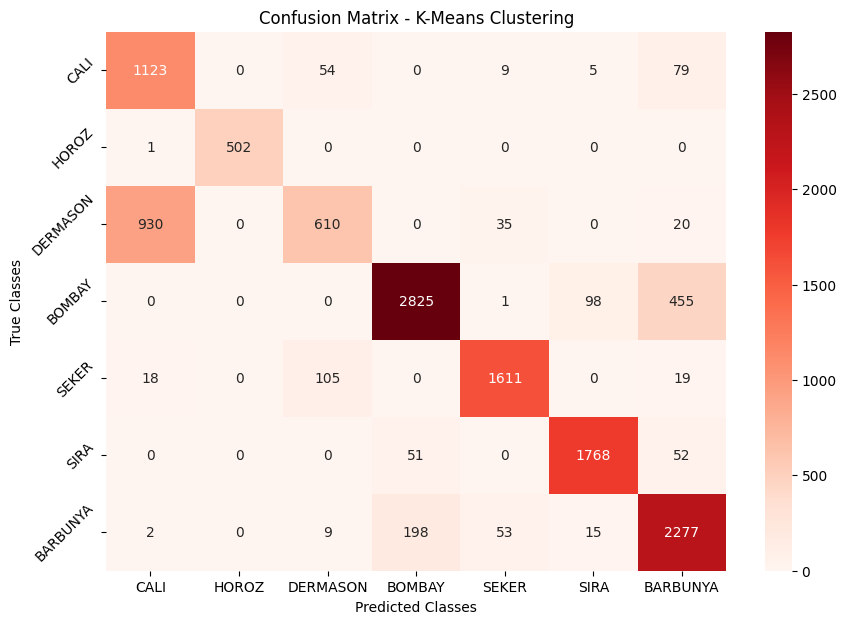

In [365]:
# Step 4: Unsupervised Learning
# K-Means Clustering

# Apply PCA to reduce dimensions
pca = PCA(n_components=8)  # Reduce to 8 components
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=len(data['Class'].unique()), n_init=10)  # Explicitly set n_init
kmeans.fit(X_pca)
data['Cluster'] = kmeans.labels_

# Map clusters to most common true class labels within each cluster
cluster_to_class_map = data.groupby('Cluster')['Class'].agg(lambda x: x.mode()[0])
data['Predicted_Class'] = data['Cluster'].map(cluster_to_class_map)

accuracy_kmeans = accuracy_score(data['Class'], data['Predicted_Class'])
print(f"Accuracy of clustering-based classification: {accuracy_kmeans:.3f}")

# Create mappings from cluster numbers to class names sorted by actual class order
unique_classes = sorted(data['Class'].unique())
cluster_class_map = data.groupby('Cluster')['Class'].agg(lambda x: x.mode()[0])
sorted_cluster_class_map = {k: v for k, v in sorted(cluster_class_map.items(), key=lambda item: unique_classes.index(item[1]))}

# Prepare labels for the heatmap (in the order of unique classes)
class_names = [sorted_cluster_class_map[i] for i in range(len(sorted_cluster_class_map))]

# Calculate the confusion matrix with actual and predicted classes
cm = confusion_matrix(data['Class'], data['Predicted_Class'], labels=unique_classes)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - K-Means Clustering')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.yticks(rotation=45)
plt.show()

Accuracy of hierarchical clustering-based classification: 0.899

PCA Component Loadings:
                      PC1       PC2       PC3       PC4       PC5       PC6
Area             0.279057  0.246746 -0.083080 -0.040602 -0.066104  0.353076
Perimeter        0.307260  0.180500 -0.025689 -0.046349  0.074296 -0.005794
MajorAxisLength  0.322162  0.101187 -0.094901 -0.014649 -0.029276  0.017078
MinorAxisLength  0.234228  0.343910 -0.005004 -0.065791  0.003302  0.032274
AspectRation     0.227441 -0.333633 -0.173505  0.045236 -0.012265 -0.087615
Eccentricity     0.231193 -0.321965 -0.148161  0.109046 -0.013258  0.241644
ConvexArea       0.279672  0.245822 -0.075914 -0.039847 -0.064018  0.355346
EquivDiameter    0.294315  0.222830 -0.059076 -0.039027 -0.008851  0.038680
Extent          -0.055478  0.220561 -0.113871  0.941231  0.216101 -0.010661
Solidity        -0.155744  0.083691 -0.786894 -0.064596 -0.303347 -0.335018
roundness       -0.254244  0.214722 -0.173152  0.057334 -0.535916  0.309897

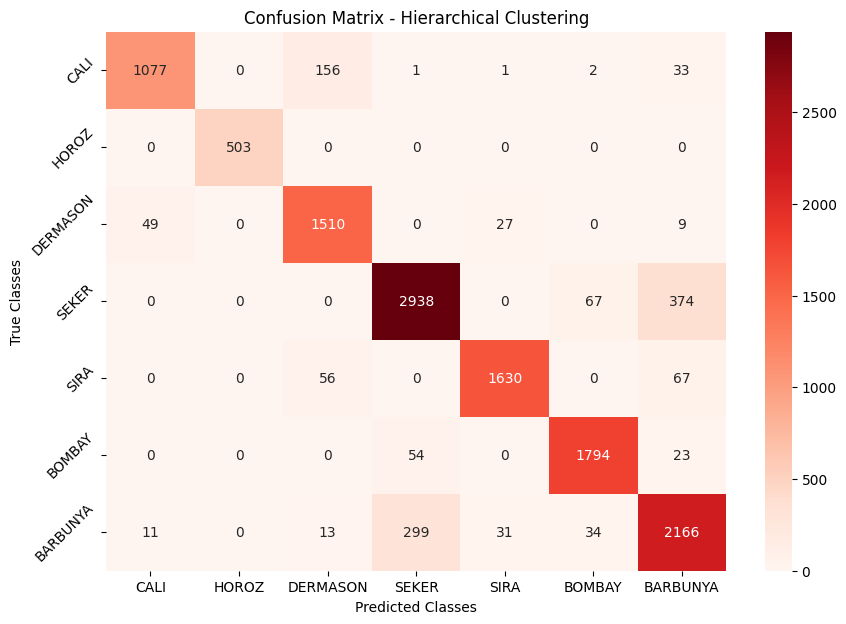

In [390]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=6)  # Reduce to 6 components
X_pca = pca.fit_transform(X)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=len(data['Class'].unique()), linkage='ward')
data['HierarchicalCluster'] = hierarchical.fit_predict(X_pca)

# Map clusters to most common true class labels within each cluster
cluster_to_class_map = data.groupby('HierarchicalCluster')['Class'].agg(lambda x: x.mode()[0])
data['Predicted_Class_Hierarchical'] = data['HierarchicalCluster'].map(cluster_to_class_map)

# Calculate accuracy
accuracy_hierarchical = accuracy_score(data['Class'], data['Predicted_Class_Hierarchical'])
print(f"Accuracy of hierarchical clustering-based classification: {accuracy_hierarchical:.3f}\n")

# Interpret PCA results (showing loadings of the first few principal components)
print("PCA Component Loadings:")
components = pca.components_
loading_scores = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])], index=X.columns)
print(f'{loading_scores}\n')

# Calculate importance scores, weighted by explained variance
importance_scores = np.square(components) * pca.explained_variance_ratio_[:, np.newaxis]
weighted_importance = np.sum(importance_scores, axis=0)

weighted_importance_df = pd.DataFrame(weighted_importance, index=X.columns, columns=['Weighted Importance'])
print(f'{weighted_importance_df.sort_values(by='Weighted Importance', ascending=False)}\n')

# Feature important scores (descending)
cluster_means = X.groupby(data['HierarchicalCluster']).mean()
feature_variability = cluster_means.var()
sorted_features = feature_variability.sort_values(ascending=False)
print('Feature importance scores:')
print(f'{sorted_features}\n')

# Re-check the mapping from clusters to classes
cluster_class_map = data.groupby('HierarchicalCluster')['Class'].agg(lambda x: x.mode()[0])

# Create mappings from cluster numbers to class names sorted by actual class order
unique_classes = sorted(data['Class'].unique())
sorted_cluster_class_map = {k: v for k, v in sorted(cluster_class_map.items(), key=lambda item: unique_classes.index(item[1]))}

# Prepare labels for the heatmap (in the order of unique classes)
class_names = [sorted_cluster_class_map[i] for i in range(len(sorted_cluster_class_map))]

# Calculate the confusion matrix with actual and predicted classes
cm = confusion_matrix(data['Class'], data['Predicted_Class_Hierarchical'], labels=unique_classes)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Hierarchical Clustering')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.yticks(rotation=45)
plt.show()

In [265]:
# Decided not to use Apriori Algorithm (Strong with association rules and not for classification)
'''
# Apriori Algorithm (Association Rule Mining)
# Assuming we convert the continuous attributes into discrete bins for the Apriori algorithm
data_bins = pd.DataFrame()
for column in X.columns:
    data_bins[column] = pd.cut(X[column], bins=5, labels=np.arange(5))

# Convert to binary format
data_binary = pd.get_dummies(data_bins, prefix='', prefix_sep='')

frequent_itemsets = apriori(data_binary, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print("Apriori Rules:")
print(rules)
'''

'\n# Apriori Algorithm (Association Rule Mining)\n# Assuming we convert the continuous attributes into discrete bins for the Apriori algorithm\ndata_bins = pd.DataFrame()\nfor column in X.columns:\n    data_bins[column] = pd.cut(X[column], bins=5, labels=np.arange(5))\n\n# Convert to binary format\ndata_binary = pd.get_dummies(data_bins, prefix=\'\', prefix_sep=\'\')\n\nfrequent_itemsets = apriori(data_binary, min_support=0.1, use_colnames=True)\nrules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)\nprint("Apriori Rules:")\nprint(rules)\n'

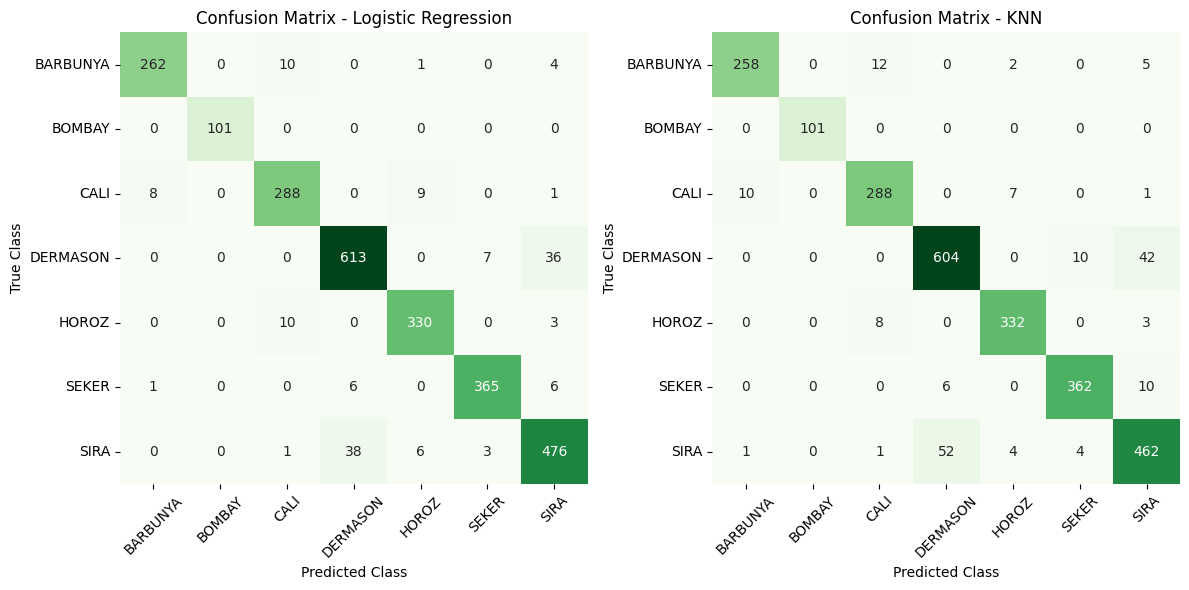

In [269]:
# Step 5: Model Evaluation

# Supervised Learning Evaluation

# Plotting Confusion Matrices for Supervised Learning
class_names = sorted(y_test.unique())

# Calculate confusion matrices
cm_logreg = confusion_matrix(y_test, y_pred_logreg, labels=class_names)
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=class_names)

plt.figure(figsize=(12, 6))
# plots are nearly identical to the cm's above
# Confusion Matrix for Logistic Regression
plt.subplot(1, 2, 1)
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Greens", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Logistic Regression")
plt.xticks(rotation=45)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Confusion Matrix for KNN
plt.subplot(1, 2, 2)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - KNN")
plt.xticks(rotation=45)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

plt.tight_layout()
plt.show()


Unsupervised Learning Model Evaluation:

K-Means Clustering - Cluster Counts:
2    3074
5    2902
6    2074
4    1886
1    1709
0     778
3     502
Name: Cluster, dtype: int64

Hierarchical Clustering - Cluster Counts:
4    3501
2    2372
0    1980
1    1940
3    1816
6     813
5     503
Name: HierarchicalCluster, dtype: int64


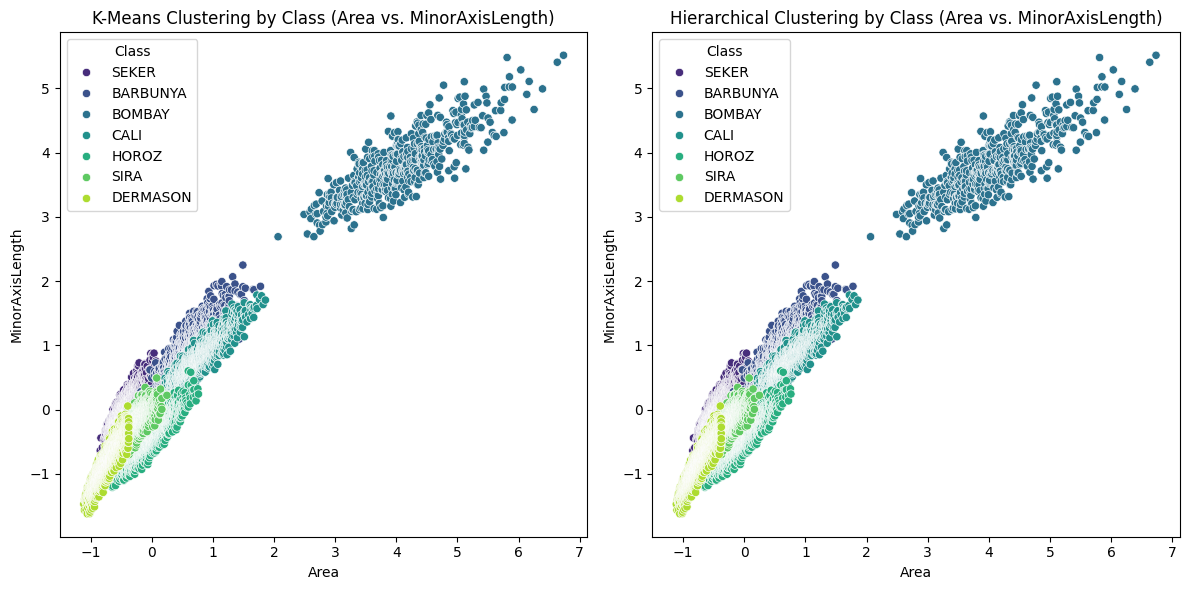

In [366]:
# Unsupervised Learning Evaluation

# Cluster Counts
print("\nUnsupervised Learning Model Evaluation:\n")
print("K-Means Clustering - Cluster Counts:")
print(data['Cluster'].value_counts())
print("\nHierarchical Clustering - Cluster Counts:")
print(data['HierarchicalCluster'].value_counts())

# Plotting Scatter Plots for Unsupervised Learning
plt.figure(figsize=(12, 6))

# Plot for K-Means Clustering
plt.subplot(1, 2, 1)
sns.scatterplot(x='Area', y='MinorAxisLength', data=data, 
                hue='Class', palette='viridis', legend='full')  # Use 'legend="full"' to ensure the legend is shown
plt.title('K-Means Clustering by Class (Area vs. MinorAxisLength)')
plt.xlabel('Area')
plt.ylabel('MinorAxisLength')

# Plot for Hierarchical Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x='Area', y='MinorAxisLength', data=data, 
                hue='Class', palette='viridis', legend='full')
plt.title('Hierarchical Clustering by Class (Area vs. MinorAxisLength)')
plt.xlabel('Area')
plt.ylabel('MinorAxisLength')

plt.tight_layout()
plt.show()